In [2]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [4]:
# Cargar datos
data = pd.read_csv('data_evaluacion.csv')

In [6]:
print(data.columns)


Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')


In [14]:
# Preprocesamiento
data = pd.get_dummies(data, drop_first=True)

In [18]:
# Preprocesamiento
data_dummies = pd.get_dummies(data, drop_first=True)

In [17]:
# Ajustar nombre de la columna objetivo
target_column = '<=50K_>50K'


In [20]:
# Verificar si la columna objetivo existe en los datos
if target_column not in data_dummies.columns:
    raise KeyError(f"La columna '{target_column}' no se encuentra en los datos preprocesados.")

X = data_dummies.drop(target_column, axis=1)
y = data_dummies[target_column]

In [21]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Encontrar el mejor valor de k
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

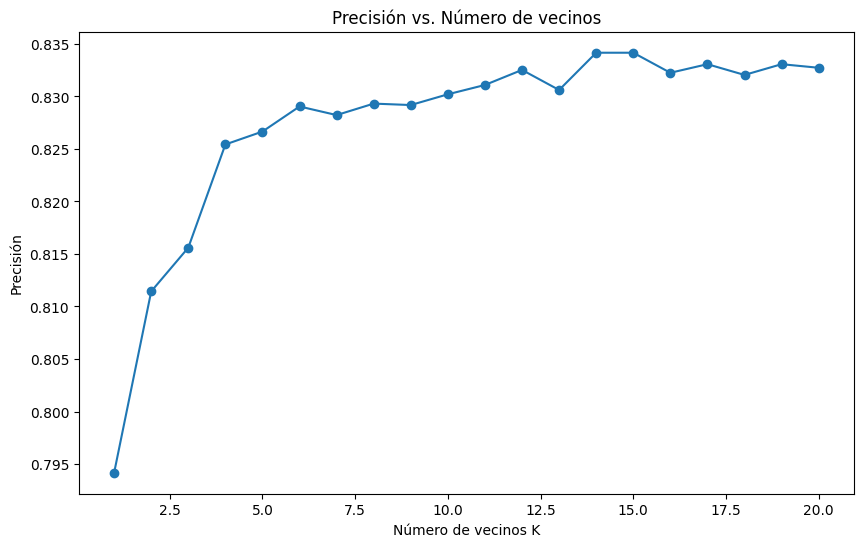

In [24]:
# Graficar la precisión en función de k
plt.figure(figsize=(10,6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos K')
plt.ylabel('Precisión')
plt.title('Precisión vs. Número de vecinos')
plt.show()


In [25]:
# Seleccionar el mejor k
best_k = k_range[scores.index(max(scores))]
print(f"El mejor valor de k es {best_k}")

El mejor valor de k es 14


In [26]:
# Entrenar y evaluar el modelo con el mejor k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=14)

In [27]:
# Evaluar el modelo
print(f"k-NN con k = {best_k}")
print("Confusión en entrenamiento:")
print(confusion_matrix(y_train, knn_best.predict(X_train_scaled)))
print("Reporte de clasificación en entrenamiento:")
print(classification_report(y_train, knn_best.predict(X_train_scaled)))

print("Confusión en prueba:")
print(confusion_matrix(y_test, knn_best.predict(X_test_scaled)))
print("Reporte de clasificación en prueba:")
print(classification_report(y_test, knn_best.predict(X_test_scaled)))

k-NN con k = 14
Confusión en entrenamiento:
[[24486  1502]
 [ 3637  4563]]
Reporte de clasificación en entrenamiento:
              precision    recall  f1-score   support

       False       0.87      0.94      0.91     25988
        True       0.75      0.56      0.64      8200

    accuracy                           0.85     34188
   macro avg       0.81      0.75      0.77     34188
weighted avg       0.84      0.85      0.84     34188

Confusión en prueba:
[[10379   787]
 [ 1643  1844]]
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

       False       0.86      0.93      0.90     11166
        True       0.70      0.53      0.60      3487

    accuracy                           0.83     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.82      0.83      0.83     14653



In [31]:
# Evaluar underfitting y overfitting
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracy = np.mean(train_pred == y_train)
    test_accuracy = np.mean(test_pred == y_test)

    print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
    print(f"Precisión en prueba: {test_accuracy:.4f}")

    if train_accuracy - test_accuracy > 0.1:
        print("Posible overfitting")
    elif test_accuracy - train_accuracy > 0.1:
        print("Posible underfitting")
    else:
        print("Modelo bien ajustado")

evaluate_model(knn_best, X_train_scaled, y_train, X_test_scaled, y_test)

Precisión en entrenamiento: 0.8497
Precisión en prueba: 0.8342
Modelo bien ajustado
